In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

---
#### CS 280 Final Project - FA23
---

# The Secret Behind Video Game Reviews

### By: Erica Kurpiewski and Harkiran Bhullar


---

## 1. Introduction

For this project, our group explored a dataframe that includes sales data for video games released in 1976 to the beginning of 2017. We looked at the number of games released in each year, the gross sales globally and regionally, the popularity of certain genres, and the critic and user scores compiled on Metacritic. We wanted to see what factors are associated with high critic and user scores. Based on our own experiences with reading critic and user reviews, the scores can be widely different. Given that this data is observational, we cannot make any cause-and-effect conclusions. However, as a result of working on this project, we were able to see what characteristics are associated with a successful game (in terms of score) for both groups and found that these characteristics are distinct between the two. For example, while high critic scores are associated with more modern releases, high user scores are not.

---

## 2. Data

A direct link to the data can be found at the following website.
 * https://www.kaggle.com/datasets/kendallgillies/video-game-sales-and-ratings

According to the website, the data is "a combined web scrape from VGChartz and Metacritic along with manually entered year of release values for most games with a missing year of release" as of January 2017.

In [2]:
#importing the data from github
video_games = pd.read_csv("https://raw.githubusercontent.com/harkiran-b/cs280_project/main/Video_Game_Sales_as_of_Jan_2017.csv")
video_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64.0,7.0,NaN,NaN,E
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [3]:
#Renaming of columns to fit specifications
video_games = video_games.rename(columns = {'Name':'name', 'Platform':'console', 'Year_of_Release':'release_year', 'Genre':'genre', 'Publisher':'publisher',
                              'NA_Sales':'sales_in_north_a', 'EU_Sales':'sales_in_europe', 'JP_Sales':'sales_in_japan', 'Other_Sales':'other_sales',
                              'Global_Sales':'total_global_sales', 'Critic_Score':'critic_score', 'Critic_Count':'num_critic_reviews',
                              'User_Score':'user_score', 'User_Count':'num_user_reviews', 'Rating':'rating_ESRB'})
#scaling the user scores to be out of 100% rather than out of 10
video_games['user_score'] = video_games['user_score']*10
video_games

,name,console,release_year,genre,publisher,sales_in_north_a,sales_in_europe,sales_in_japan,other_sales,total_global_sales,critic_score,num_critic_reviews,user_score,num_user_reviews,rating_ESRB
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,80.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,83.0,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,80.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64.0,7.0,NaN,NaN,E
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN


### 2.1 Summary of Variables within the Video Games Table

The "video_games" table has 15 columns/variables and 17,416 rows. We now explain each variable, giving their units, indicating their types, and providing some descriptive statistics.

**Categorical variables:**

* **name** – The name/title of the video game
  * Number of missing values: 0
  * Contains 12,080 distinct values:
    * Ex: Wii Sports, Super Mario Bros., God of War, Banjo-Kazooie, Sonic the Hedgehog
  * Additional Information:
    * Some games are listed more than once due to being released on multiple consoles

* **console** – The console that the game was released on
    * Number of missing values: 0
    * Contains 31 distinct values:
        * Ex: 2600 (Atari 2600), G (Gameboy), SCD (Sega CD), GEN (Sega Genesis), SAT (Sega Saturn), WS (WonderSwan), NG (Neo Geo)

* **release_year** – The year that the game was initially released
    * Number of missing values: 8
    * Contains 42 distinct values:
        * Ex: 1999, 2008, 2013

* **genre** – The primary classification of the game based on how it is played
    * Number of missing values: 0
    * Contains 12 distinct values:
        * Sports - inspired by/based around actual sports
        * Platform - primary focus is traversing across areas
        * Racing - players race vehicles in fantasy areas or simulated real-world tracks
        * Role-Playing - character grows in strength and experience as the game progresses
        * Puzzle - solve various puzzles like Sudoku
        * Misc - catch-all category for other sub-genres such as fitness, rhythm, trivia, and sandbox
        * Shooter - players participate in action by using ranged weapons against other players/enemies
        * Simulation - simulating real world or ficitional scenarios
        * Action - focuses on challenges that require hand-eye coordination and fine motor skills
        * Fighting - focuses on close-ranged combat, mostly one-on-one brawls
        * Adventure - explore environments through character interactions or puzzles
        * Strategy - requires careful thinking and planning to progress
    * Additional Information:
        * Some games are categorized by multiple genres, but the dataset lists the main genre in the column.
        * Misceallneous does not mean that a game is classified by multiple genres

* **publisher** – The name of the company that published the game
    * Number of missing values: 1
    * Contains 627 distinct values:
        * Ex: Nintendo, SEGA, Activision, Blizzard, Square Enix

* **rating_ESRB** – The rating the Entertainment Software Ratings Board gave the game
    * Number of missing values: 7,164
    * Contains 8 distinct values:
        * E - For everyone, any age can play
        * M - For Mature audiences, ages 17 and up
        * T - for teens, ages 13 and up
        * E10+ - For everyone ages 10 and up
        * K-A - Kids to adults
        * AO - For Adults, ages 18 and up
        * EC - Early childhood
        * RP - Rating Pending, has not been assigned a final rating
        * The ESRB only provides ratings for North America. Europe uses PEGI (Pan-European Game Information) and Japan uses CERO (Computer Entertainment Rating Organization). So, the rows (games) without an ESRB rating were either released before the ERSB was established or they were only released in Eurpoe or Japan.
    * Additional Information:
        * The 'K-A' rating was replaced with the 'E' rating in 1998
        * Fun Fact: The 'EC' rating was discontinued in 2018 as it still fits under the 'E' rating

**Continuous variables:**

* **sales_in_north_a** - Sales in North America (in millions)
    * Number of missing values: 0
    * Units: Millions
    * max value: 41.36
    * min value: 0
    * average value: 0.2545

* **sales_in_europe** - Sales in Europe (in millions)
    * Number of missing values: 0
    * Units: Millions
    * max value: 28.96
    * min value: 0
    * average value: 0.1407

* **sales_in_japan** - Sales in Japan (in millions)
    * Number of missing values: 0
    * Units: Millions
    * max value: 10.22
    * min value: 0
    * average value: 0.075

* **other_sales** - Sales in the rest of the world (in millions)
    * Number of missing values: 0
    * Units: Millions
    * max value: 10.57
    * min value: 0
    * average value: 0.0459

* **total_global_sales** - Total worldwide sales (in millions)
    * Number of missing values: 0
    * Units: Millions
    * max value: 82.54
    * min value: 0
    * average value: 0.5164

**Quantitative Discrete Variables:**

* **critic_score** - Aggregate score compiled by Metacritic staff
    * Number of missing values: 9080
    * max value: 98.00
    * min value: 13.00
    * average value: 68.9125
    * Note: The critic score rating is out of 100

* **num_critic_reviews** - The number of critics used in coming up with the critic score
    * Number of missing values: 9080
    * max value: 113.00
    * min value: 3.00
    * average value: 26.1920

* **user_score** – The average score given by users on Metacritic
    * Number of missing values: 9,618
    * max value: 9.7
    * min value: 0.0
    * average value: 7.117056
    * Note: The user score rating is out of 10

* **num_user_reviews** – The number of users that left a score/review on a game
    * Number of missing values: 9,618
    * max value: 10,766
    * min value: 4
    * average value: 162.672480



### 2.2 Code used to Summarize Variables

In this section we include the code used to describe the variables in the previous section.  

In [4]:
#1: Descriptive Stats for "name"
print(video_games['name'].nunique(),'unique values\n', video_games['name'].isna().sum(), 'missing values')

12080 unique values
 0 missing values


In [5]:
#2: Descriptive Stats for "console"
num_consoles = video_games['console'].nunique()
print(num_consoles,'unique values\n',video_games['console'].isna().sum(), 'missing values\n', video_games['console'].unique())

31 unique values
 0 missing values
 ['Wii' 'NES' 'G' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'X' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [6]:
#3: Descriptive Stats for "release_year"
print(video_games['release_year'].nunique(),'unique values\n', video_games['release_year'].isna().sum(),'missing values')

42 unique values
 8 missing values


In [7]:
#4: Descriptive Stats for "genre"
num_genres = video_games['genre'].nunique()
print(num_genres,'unique values\n', video_games['genre'].isna().sum(), 'missing values\n',video_games['genre'].unique())

12 unique values
 0 missing values
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [8]:
#5: Descriptive Stats for "publisher"
print(video_games['publisher'].nunique(),'unique values\n', video_games['publisher'].isna().sum(),'missing values')

627 unique values
 1 missing values


In [9]:
#6: Descriptive Stats for "rating_ESRB"
num_ESRB_ratings = video_games['rating_ESRB'].nunique()
print(num_ESRB_ratings,'unique values\n', video_games['rating_ESRB'].isna().sum(), 'missing values\n',video_games['rating_ESRB'].unique())

8 unique values
 7164 missing values
 ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [10]:
#7: Descriptive Stats for "user_score"
print(video_games['user_score'].isna().sum(),'missing values\n', video_games['user_score'].describe())

9618 missing values
 count    7798.000000
mean       71.170557
std        15.024102
min         0.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        97.000000
Name: user_score, dtype: float64


In [11]:
#8: Descriptive Stats for "num_user_reviews"
print(video_games['num_user_reviews'].isna().sum(),'missing values\n', video_games['num_user_reviews'].describe())

9618 missing values
 count     7798.000000
mean       162.672480
std        562.837954
min          4.000000
25%         10.000000
50%         25.000000
75%         81.000000
max      10766.000000
Name: num_user_reviews, dtype: float64


In [12]:
#9: Descriptive Stats for "sales_in_north_a"
print('Missing values: ', video_games['sales_in_north_a'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['sales_in_north_a'].describe())

Missing values:  0 
Descriptive Stats:
 count    17416.000000
mean         0.254534
std          0.800673
min          0.000000
25%          0.000000
50%          0.070000
75%          0.230000
max         41.360000
Name: sales_in_north_a, dtype: float64


In [13]:
#10: Descriptive Stats for "sales_in_europe"
print('Missing values: ', video_games['sales_in_europe'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['sales_in_europe'].describe())

Missing values:  0 
Descriptive Stats:
 count    17416.000000
mean         0.140727
std          0.497341
min          0.000000
25%          0.000000
50%          0.020000
75%          0.100000
max         28.960000
Name: sales_in_europe, dtype: float64


In [14]:
#11: Descriptive Stats for "sales_in_japan"
print('Missing values: ', video_games['sales_in_japan'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['sales_in_japan'].describe())

Missing values:  0 
Descriptive Stats:
 count    17416.000000
mean         0.075020
std          0.303412
min          0.000000
25%          0.000000
50%          0.000000
75%          0.030000
max         10.220000
Name: sales_in_japan, dtype: float64


In [15]:
#12: Descriptive Stats for "other_sales"
print('Missing values: ', video_games['other_sales'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['other_sales'].describe())

Missing values:  0 
Descriptive Stats:
 count    17416.000000
mean         0.045908
std          0.183932
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64


In [16]:
#13: Descriptive Stats for "total_global_sales"
print('Missing values: ', video_games['total_global_sales'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['total_global_sales'].describe())

Missing values:  0 
Descriptive Stats:
 count    17416.000000
mean         0.516469
std          1.526124
min          0.010000
25%          0.050000
50%          0.160000
75%          0.450000
max         82.540000
Name: total_global_sales, dtype: float64


In [17]:
#14: Descriptive Stats for "critic_score"
print('Missing values: ', video_games['critic_score'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['critic_score'].describe())

Missing values:  9080 
Descriptive Stats:
 count    8336.000000
mean       68.912548
std        13.964937
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


In [18]:
#15: Descriptive Stats for "num_critic_reviews"
print('Missing values: ', video_games['num_critic_reviews'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['num_critic_reviews'].describe())

Missing values:  9080 
Descriptive Stats:
 count    8336.000000
mean       26.192059
std        18.991526
min         3.000000
25%        11.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: num_critic_reviews, dtype: float64


---

## 3. Results

#### 3.1: Exploring the total sales of each region for each genre

To begin, we wanted to get an idea of what games were/are popular or are most successful based on total sales and their genre.

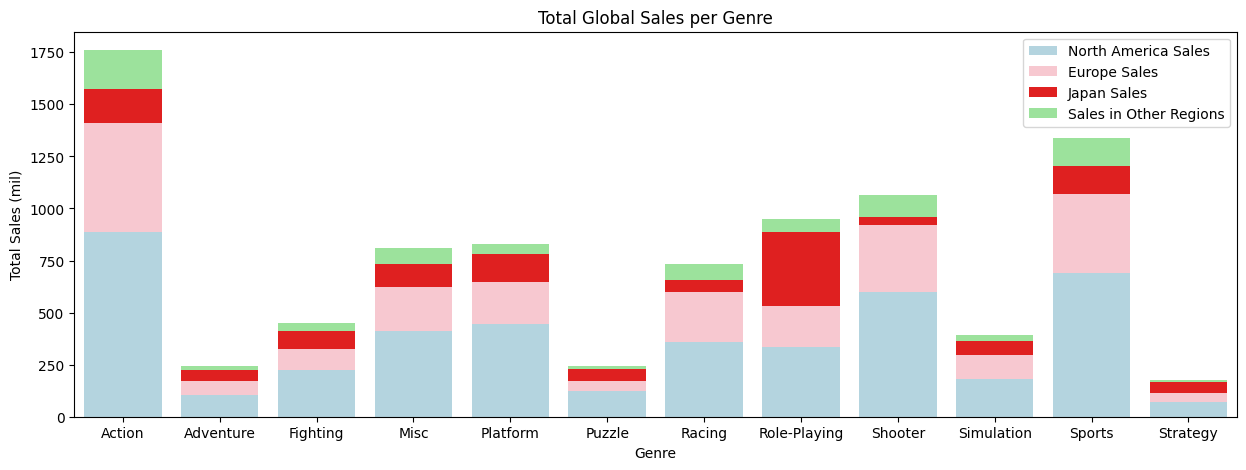

In [19]:
#Grouping by genre
grped_genres = video_games.groupby(by=['genre']).agg({'sales_in_north_a':'sum','sales_in_europe':'sum',
                                                      'sales_in_japan':'sum','other_sales':'sum'}).reset_index()
#Building stacked bar graph
plt.figure(figsize = (15, 5))
sns.barplot(data = grped_genres, x = "genre", y = "sales_in_north_a", label = "North America Sales", color = "lightblue", errwidth = 0)
sns.barplot(data = grped_genres, x = "genre", y = "sales_in_europe", label = "Europe Sales", color = "pink", errwidth = 0,
           bottom = grped_genres['sales_in_north_a'])
sns.barplot(data = grped_genres, x = "genre", y = "sales_in_japan", label = "Japan Sales", color = "red", errwidth = 0,
           bottom = grped_genres['sales_in_north_a'] + grped_genres['sales_in_europe'])
sns.barplot(data = grped_genres, x = "genre", y = "other_sales", label = "Sales in Other Regions", color = "lightgreen", errwidth = 0,
           bottom = grped_genres['sales_in_north_a'] + grped_genres['sales_in_europe'] + grped_genres['sales_in_japan'])
plt.title("Total Global Sales per Genre")
plt.xlabel("Genre")
plt.ylabel("Total Sales (mil)")
plt.legend();

Based on the graph, action games have the greatest total amount of sales for all genres, with sports games following with the second greatest total. North America, for almost all genres, generates the most sales. The sole exception being Role-playing games where Japan has the greatest sales. For each region their 3 most popular genres, based on sales, are Action, Sports, and Shooters for North America, Action, Sports, and Shooters again for Europe, Role-playing, Action, and Sports for Japan, and Action, Sport, and Shooters for other regions. To support this, we generated the numbers below.

In [20]:
#Getting top 3 genres for each sales region
print(grped_genres[['genre','sales_in_north_a']].sort_values('sales_in_north_a', ascending = False).head(3), '\n',
      grped_genres[['genre','sales_in_europe']].sort_values('sales_in_europe', ascending = False).head(3), '\n',
      grped_genres[['genre','sales_in_japan']].sort_values('sales_in_japan', ascending = False).head(3), '\n',
      grped_genres[['genre','other_sales']].sort_values('other_sales', ascending = False).head(3))

      genre  sales_in_north_a
0    Action            885.32
10   Sports            688.60
8   Shooter            600.01 
       genre  sales_in_europe
0    Action           525.31
10   Sports           380.16
8   Shooter           321.82 
            genre  sales_in_japan
7   Role-Playing          358.02
0         Action          163.65
10        Sports          135.80 
       genre  other_sales
0    Action       186.56
10   Sports       135.70
8   Shooter       106.03


While it is interesting to see the total sales of games for each region as a whole, we also wanted to explore the growth of video games in terms of sales over time and the possibility of predicting how well a game would do prior to a global release.

##### 3.1.1 - Exploring further: Since many games are released in Japan first, is it reasonable to use the sales made in Japan to predict the sales of the rest of the world? #####


Many video game companies and distributors are located in Japan. So, many games are released in the region first before the rest of the world. This could be due to many reasons such as localization issues. Since quite a few games are released in Japan first, we thought it would be interesting to see if a reasonable predicitve model could be generated using Japan's sales data to predict the total global sales.

In [21]:
#Generating correlation data by taking out Japan's sales from the total sales
video_games['global_sales_wout_japan'] = video_games['total_global_sales']-video_games['sales_in_japan']
video_games[['sales_in_japan','global_sales_wout_japan']].corr()

,sales_in_japan,global_sales_wout_japan
sales_in_japan,1.000000,0.464703
global_sales_wout_japan,0.464703,1.000000


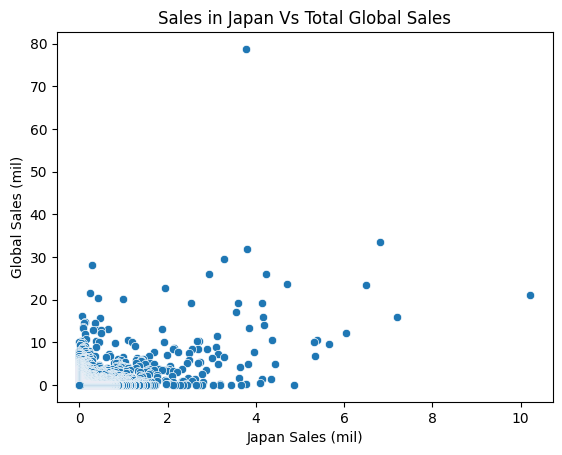

In [22]:
#Building scatterplot of Japan Sales vs Global Sales
sns.scatterplot(data = video_games, x = 'sales_in_japan', y = 'global_sales_wout_japan')
plt.title('Sales in Japan Vs Total Global Sales')
plt.xlabel('Japan Sales (mil)')
plt.ylabel('Global Sales (mil)');

To generate a confidence interval that could contain the true correlation coefficient between sales in Japan and the total sales globally, we take many samples from our original at random and calculate a coefficient for each bootstrapped sample.

In [23]:
#Simulating picking many bootstraps of correlation coefficients
num_iterations = 10000
n = len(video_games)
results_many_ccs = np.array([])

for i in range(num_iterations):
    bootstrap = video_games.sample(n, replace = True)
    r = bootstrap.corr(numeric_only = True)["sales_in_japan"]["global_sales_wout_japan"]

    results_many_ccs = np.append(results_many_ccs, r)

results_many_ccs

array([0.44653392, 0.45552575, 0.46415437, ..., 0.43740832, 0.39906148,
       0.4281438 ])

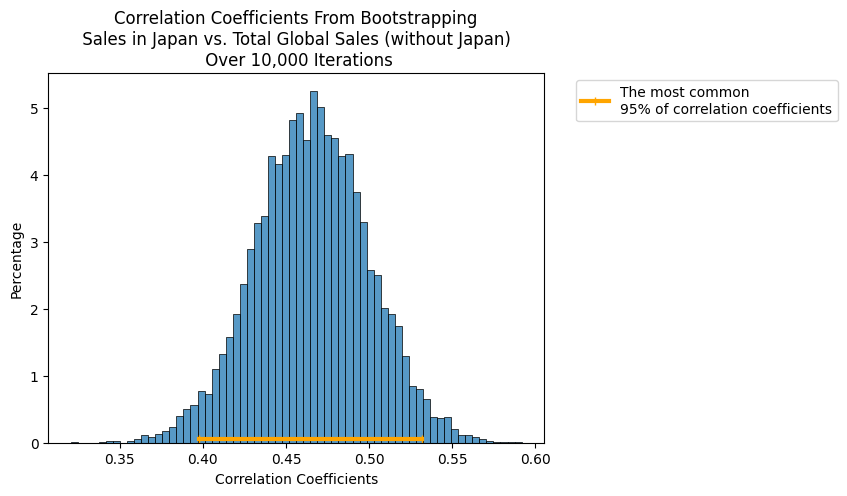

In [24]:
#Finding the 95% confidence interval
results_many_ccs = np.sort(results_many_ccs)
left_endpoint = np.percentile(results_many_ccs, 2.5, method = 'higher')
right_endpoint = np.percentile(results_many_ccs, 97.5, method = 'higher')

#Generating histogram/empirical distribution of bootstrapped results
sns.histplot(results_many_ccs, stat='percent')
plt.title(f"Correlation Coefficients From Bootstrapping\n Sales in Japan vs. Total Global Sales (without Japan) \n Over {num_iterations:,} Iterations")
plt.xlabel("Correlation Coefficients")
plt.ylabel("Percentage")
plt.plot([left_endpoint, right_endpoint], [0.05, 0.05],
         color = "orange", linewidth=3, marker = '|', label='The most common\n95% of correlation coefficients');
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left');

In [25]:
#Printing the endpoints
left_endpoint, right_endpoint

(0.3977000614943724, 0.5321994605217398)

We are 95% confident that the true/population correlation coefficient (for sales in Japan vs the total global sales for every other region) is between approximately 0.3988 and 0.5325. The correlation between the sales of video games in Japan when compared to the rest of the world is on the weaker side, and thus a regression line would not be an optimal choice for this situation. However, it is beneficial to visualize the model regardless.

In [26]:
#Generating the slope coefficient and intercept for linear regression model
x_japan_sales = video_games[['sales_in_japan']]
y_global_wout_jp_sales = video_games[['global_sales_wout_japan']]

linear_regressor_games = lm.LinearRegression()  # creating model object
linear_regressor_games.fit(x_japan_sales, y_global_wout_jp_sales)

slope_coeffs = linear_regressor_games.coef_[0][0]
intercept = linear_regressor_games.intercept_[0]

print('Slope Coefficients:', slope_coeffs)
print('\nIntercept Value:', intercept)
print(f'Equation: y={slope_coeffs:.3f}x+{intercept:.3f}')

Slope Coefficients: 2.084944004029326

Intercept Value: 0.2850383131014885
Equation: y=2.085x+0.285


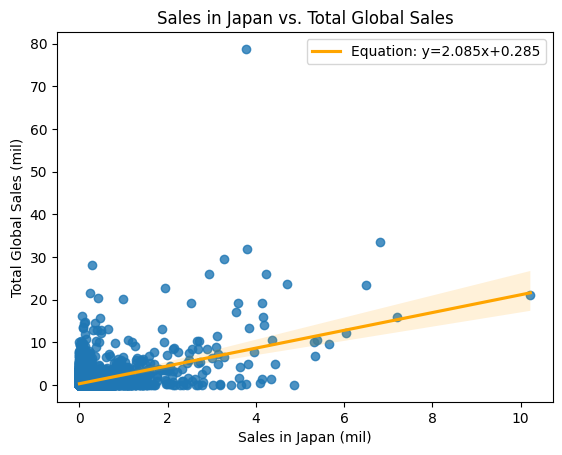

In [27]:
#Generating Linear Regression model on a graph
reg_line_label = f'Equation: y={slope_coeffs:.3f}x+{intercept:.3f}'

sns.regplot(data = video_games, x = 'sales_in_japan', y = 'global_sales_wout_japan', line_kws = {"color":"orange", "label":reg_line_label})
plt.title('Sales in Japan vs. Total Global Sales')
plt.xlabel('Sales in Japan (mil)')
plt.ylabel('Total Global Sales (mil)')
plt.legend();

Based on this regression line, we would predict that a video game that did not sell in Japan would have a global total of about 0.285 million in sales ($285,000). Even though many games are released in Japan first, it is not the most reasonable assumption to make that the sales in Japan can be used to predict the sales of a game in the other regions of the world. So while we cannot make an accurate predictive model, we can look at the past trends to further our research.


---



#### 3.2: Have video game sales increased over time within each region with the increase of games available globally?

As technology has improved and the overall popularity of games has grown, we wanted to generate a graph that would visualize that growth over time.

In [28]:
#Grouping games by release year
grped_years = video_games.groupby('release_year').agg({'name':'count', 'sales_in_north_a':'sum','sales_in_europe':'sum',
                                                      'sales_in_japan':'sum','other_sales':'sum'}).reset_index()
grped_years

,release_year,name,sales_in_north_a,sales_in_europe,sales_in_japan,other_sales
0,1976.0,1,0.41,0.03,0.00,0.00
1,1977.0,3,1.86,0.11,0.00,0.01
2,1978.0,4,3.05,0.18,0.00,0.03
3,1979.0,1,0.29,0.02,0.00,0.00
4,1980.0,14,13.91,0.88,0.00,0.15
5,1981.0,46,33.40,1.96,0.00,0.32
6,1982.0,37,27.36,1.68,0.00,0.31
7,1983.0,18,8.01,0.82,8.10,0.14
8,1984.0,14,33.28,2.10,14.27,0.70
9,1985.0,14,33.73,4.74,14.56,0.92


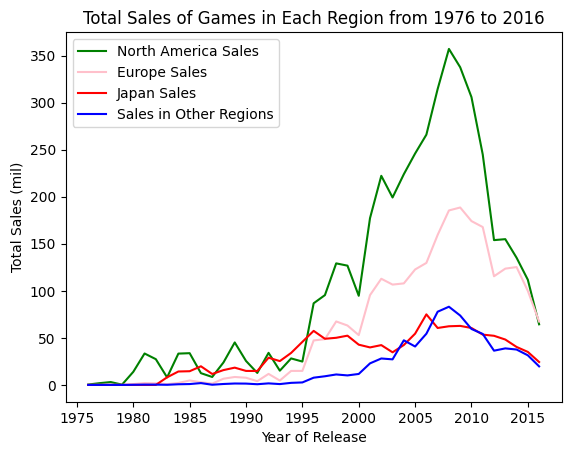

In [29]:
#Excluding 2017
grped_years = grped_years[grped_years['release_year'] != 2017]

#Building lineplot
sns.lineplot(data = grped_years, x = 'release_year', y = 'sales_in_north_a',color='green', label = 'North America Sales')
sns.lineplot(data = grped_years, x = 'release_year', y = 'sales_in_europe', color='pink', label = 'Europe Sales')
sns.lineplot(data = grped_years, x = 'release_year', y = 'sales_in_japan', color='red', label = 'Japan Sales')
sns.lineplot(data = grped_years, x = 'release_year', y = 'other_sales', color='blue', label = 'Sales in Other Regions')
plt.title('Total Sales of Games in Each Region from 1976 to 2016')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (mil)')
plt.legend();

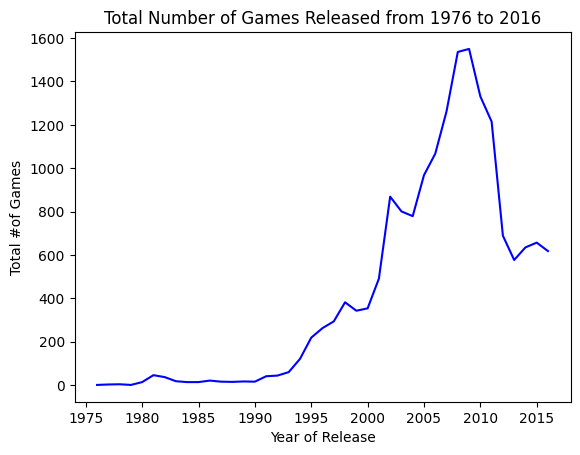

In [30]:
#Building lineplot for the # of games released every year
sns.lineplot(data = grped_years, x = 'release_year', y = 'name',color='blue')
plt.title('Total Number of Games Released from 1976 to 2016')
plt.xlabel('Year of Release')
plt.ylabel('Total #of Games');

Overall, the total sales of video games within each region has increased from the 1970's to the 2000's. The highest peak for North America was in 2008, Europe peaked in 2009, Japan's greatest amount of sales was in 2006, and sales from other regions reached the highest amount in 2007. There is a decline in sales from 2008 to 2016 (2017 was excluded as it only included the games released from January). Japan has seen more of a gradual increase, whereas the other areas seemed to spike or greatly increase over the course of a couple of years. With the increase of games being made and sold, there is subsequently an increase in the number of reviews being conducted whether by critics or by the players.


---



##### 3.2.1: Have review scores improved or worsened with the rate of games being released increasing or decreasing?

One thing we wanted to explore was the possible association between the quantity of games being released and their score (either by critics or users). The thought was that are games being rated higher when there's a surplus amount of subpar quality or are they being rated lower. We wanted to see if the declining sales of games is related to the mindset of quality over quantity or possibly vice versa.

In [31]:
#creating a chart with the average score per year
releases = video_games[['release_year', 'user_score', 'critic_score']].groupby('release_year').mean().reset_index().dropna()

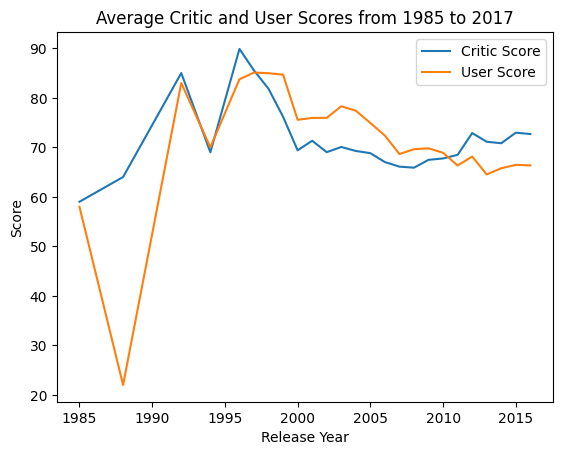

In [32]:
#Generating lineplot for reviews over time
sns.lineplot(releases, x = 'release_year', y = 'critic_score', label = 'Critic Score')
sns.lineplot(releases, x = 'release_year', y = 'user_score', label = 'User Score')
plt.title('Average Critic and User Scores from 1985 to 2017')
plt.xlabel('Release Year')
plt.ylabel('Score')
plt.legend();

This initial graph shows us that review socres on average were higher in the years where there was less game releases. For example, the peak of scores was approximately between the years 1992 and 1998. The number of video games released during these years was around 200-400 games. In comparison, if we look at years 1998-2005, we see a sharp decline in review scores and subsquently we see a rise in video game releases (from 400 to 1500 games released). We wanted to conduct a hypothesis test to back our findings.

 To test this, we took the year with the highest number of video games recorded to be released within the dataset (2009 with 1550 games) and the most recent full year (2016 with 618 games). We shuffled the scores of each year and took the means. We then took the difference between the means and recorded them. This process was repeated many, many times. A positive result would mean that 2016's critic scores were overall higher than 2009's. A negative results would mean that 2009's critic scores were overall higher.

Null Hyothesis: There is no association between the number of games released within a year (2009 or 2016) and the average critic score. (The average critic score in 2016 is not higher than the average critic score in 2009)

$$\mu_N = \mu_S$$

Alternative Hypothesis: There is an association between the number of games released within a year (2009 or 2016) and the average critic score. (The average critic score in 2016 is higher than the average critic score in 2009)

$$\mu_N < \mu_S $$

Note: $$\mu_N \text{ represents the true mean of critic scores for all games released in 2009}$$

$$ \mu_S \text{ represents the true mean of critic scores for all games released in 2016}$$

Testing with an alpha value = 0.05

In [33]:
#Simulating a permutation test for release year
num_iterations = 10000
results_many_score_shuffles = np.array([])
video_games_year = video_games[(video_games['release_year'] == 2009) | (video_games['release_year'] == 2016)].reset_index()

for i in range(num_iterations):

    #permuting data
    video_games_year['shuffled_scores'] = np.random.permutation(video_games_year['critic_score'])

    #Separating by year
    scores_2009_after_shuffling = video_games_year[video_games_year['release_year'] == 2009]
    scores_2016_after_shuffling = video_games_year[video_games_year['release_year'] == 2016]

    #calculating the dfference in means and recording it
    diff_in_means_scores = scores_2016_after_shuffling['shuffled_scores'].mean() - scores_2009_after_shuffling['shuffled_scores'].mean()
    results_many_score_shuffles = np.append(results_many_score_shuffles, diff_in_means_scores)

results_many_score_shuffles

array([-0.78649326,  0.2147143 , -0.6288398 , ...,  1.73707499,
        1.78447126,  0.64567736])

In [34]:
#Generating Test Statistic
mean_2009_score = video_games_year[video_games_year['release_year'] == 2009]
mean_2009_score = mean_2009_score['critic_score'].mean()
mean_2016_score = video_games_year[video_games_year['release_year'] == 2016]
mean_2016_score = mean_2016_score['critic_score'].mean()
test_stat_2009_vs_2016 = mean_2016_score - mean_2009_score
test_stat_2009_vs_2016

5.208187712935484

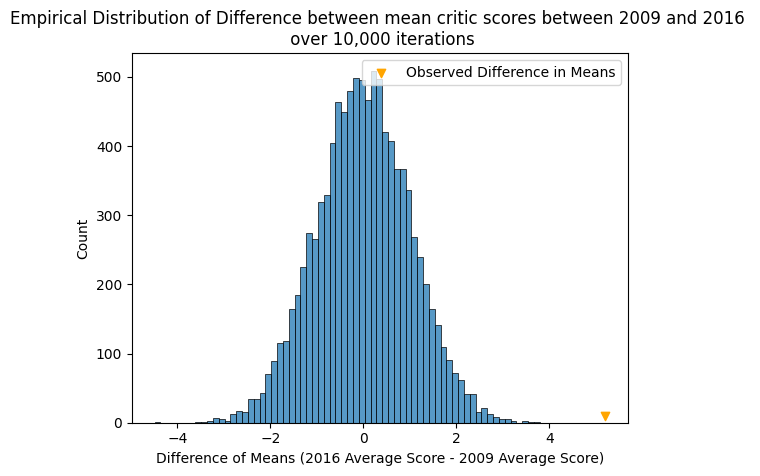

In [35]:
#Building histogram/empirical distribution of simulated results
sns.histplot(results_many_score_shuffles)
plt.scatter(test_stat_2009_vs_2016, 10, marker ='v', color = 'orange', label='Observed Difference in Means')
plt.title(f'Empirical Distribution of Difference between mean critic scores between 2009 and 2016 \n over {num_iterations:,} iterations')
plt.xlabel('Difference of Means (2016 Average Score - 2009 Average Score)')
plt.legend();

In [36]:
#Calculating the p-value
p_value = np.count_nonzero(results_many_score_shuffles >= test_stat_2009_vs_2016)/num_iterations
p_value

0.0

Under the assumption that the null hypothesis is true (there is no association between the number of games released within a year (2009 or 2016) and the average critic score), there is essentially a 0.0% chance that we would observe a test statistic as extreme or moreso than 5.2082 (or more). Given than 0.0 is less than our alpha value of 0.05, we reject the notion that there is no association between genre and total global sales, and accept the alternative. There is evidence to support that the average critic score in 2016 is higher than the average critic score in 2009. Whether or not this evidence supports the idea that critics prefer quality over quantity, we cannot be sure of. There could be plenty of factors that led to high critic scores in 2016 over 2009.


---



There are many cases where critics rate a game higher than users or vice versa. A game could be considered a failure to critics, but a cult classic to users. For example, Kirby Air Ride - released on the Gamecube - was given a 61 out of 100 by critics. Whereas users rated it 8.2 out of 10 (or 82 out of 100). Or to provide an even bigger extreme, Sonic Adventure DX (Xbox 360) was rated 48 by critics and users gave it a 7.7. With such a rather large difference between the two groups, we wanted to see what the general trend was when comparing the two.

#### 3.3: Do critics rate games higher than users or vice versa?

Text(0.5, 0, 'score')

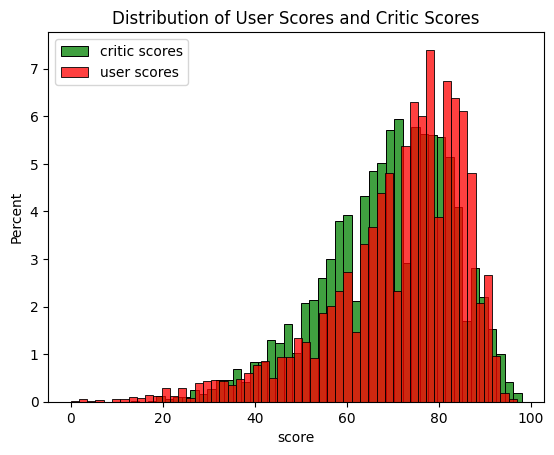

In [37]:
#plotting initial view of critic scores and user scores
sns.histplot(data = video_games, x = 'critic_score', stat = 'percent', color = 'green', label = 'critic scores')
sns.histplot(data = video_games, x = 'user_score', stat = 'percent', color = 'red', label = 'user scores')

plt.legend()
plt.title('Distribution of User Scores and Critic Scores')
plt.xlabel('score')

From this visualization we learn that overall, user scores are higher than critic scores. This helps us determine what we want ot look for in our next visualizations. From this data we can assume there is some factor that leads users to score video games higher than critics and we can try to focus in on this with our next visualizations. However, before we can do that, we want to see how accurate this result is, to do so, we need to conduct a hypothesis test to see if there is truly a difference between average user scores vs average critic scores.

We are currently undertaking a hypothesis test with the objective of examining the existence of a statistically significant distinction between user scores and critic scores, while considering the possibility that these two variables are the exclusive determinants of such disparities. Our analytical approach involves permutation testing, which allows us to assess whether these specified variables are indeed the sole contributors to variations in scores. Verification of the null hypothesis would suggest the absence of any external factors that could account for the observed score discrepancies. Conversely, substantiating the alternative hypothesis would imply the presence of additional factors capable of clarifying the observed differences.

Null Hypothesis: There is NO difference between the average user score and the average critic score

$$\mu_U - \mu_C = 0 $$

Alternative Hypothesis: There is a difference between the average user score and the average critic score

$$\mu_U - \mu_C \neq 0 $$

Note:
$$\mu_U \text{ represents true average user score} $$

$$\mu_S \text{ represents true average critic score}$$

In [38]:
#Creating a new data frame has a column for reviewer and their score side by side (easy to permutate)
scores = pd.DataFrame({"score_reviewer":['U'] * 17416 + ['C'] * 17416, "score":np.append(video_games['user_score'], video_games['critic_score'])})
scores = scores.dropna()
scores

,score_reviewer,score
0,U,80.0
2,U,83.0
3,U,80.0
6,U,85.0
7,U,66.0
...,...,...
34817,C,60.0
34818,C,68.0
34820,C,67.0
34823,C,85.0


Generating the test statistic off of the original data. This is so we know what the average difference is of our current numbers to then compare with the simulated differences. We will first find the average user score, then the average critic score and then subtract the two to get our difference.

In [39]:
#calculating average user score
user_mean = scores[scores['score_reviewer'] == 'U']['score'].mean()
user_mean

71.1705565529623

In [40]:
#calculating average critic score
critic_mean = scores[scores['score_reviewer'] == 'C']['score'].mean()
critic_mean

68.91254798464492

In [41]:
#Finding the difference between the average user score and critic score
test_value_score = user_mean - critic_mean
test_value_score

2.258008568317379

Next we will simulate multiple instances of video game review scores and check the average difference between user scors and critic scores. This will help us create a visualization in which we can see where our test statistic falls.

In [42]:
#Setting the inital vlaues
num_iterations = 10000
n = 161354  #number of rows in the orignial dataframe
results_many_scores = np.array([])

#looping thorugh many instances of review scores and recording the difference between average user and critic scores
for i in range(num_iterations):
    scores['reviewer_shuffled'] = np.random.permutation(scores['score_reviewer'])
    user_mean = scores[scores['reviewer_shuffled'] == 'U']['score'].mean()
    critic_mean = scores[scores['reviewer_shuffled'] == 'C']['score'].mean()

    diff_means = user_mean - critic_mean
    results_many_scores = np.append(results_many_scores, diff_means)

results_many_scores

array([ 0.04481254,  0.0026186 ,  0.01974438, ...,  0.08750287,
       -0.04503572,  0.05176213])

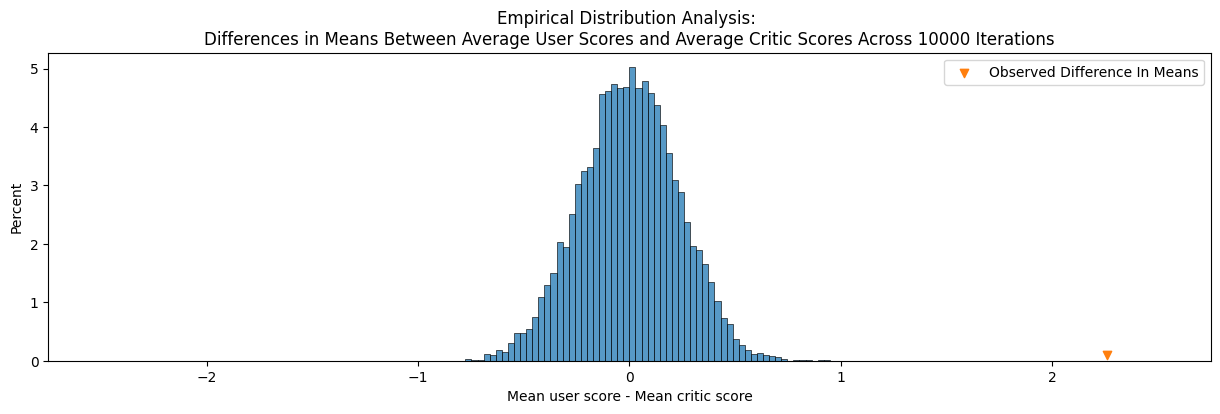

In [43]:
#plotting findings
plt.figure(figsize = (15,4))
sns.histplot(results_many_scores, stat = 'percent', binrange = (-2.5, 2.5))
plt.scatter(test_value_score, .1, marker = 'v', label = 'Observed Difference In Means')

plt.title(f"Empirical Distribution Analysis: \nDifferences in Means Between Average User Scores and Average Critic Scores Across {num_iterations} Iterations")
plt.xlabel("Mean user score - Mean critic score")
plt.legend()

We now calculate the p-value to determine the statistical significance of the simulated differences in comparison to the test statistic.

In [44]:
p_value = np.count_nonzero((results_many_scores >= test_value_score) | (results_many_scores <= 0 - test_value_score)) / num_iterations
p_value

0.0

The probability of observing a test statistic as extreme as 2.25, under the assumption that there is no discernible difference between the average scores given by critics and users, is calculated to be approximately 0.0%. Such an occurrence is exceedingly improbable, providing compelling evidence in support of the presence of a substantive difference in the averages of these scores. Consequently, we reject the null hypothesis.

In summary, the analysis reveals that users, on average, assign higher scores to games than critics. This pivotal insight guides the subsequent phases of our project, where we aim to investigate and clarify the factors contributing to the observed discrepancy between user and critic scores.

The next area we wanted to look at was the number of reviews. If there a party that leaves more reviews than the other? If there is, could this mean something?

#### 3.4: Exploring the differences in the number or reviews between critics and users based on genre.

In [45]:
#creating a dataframe that holds the total critic and user reiveiws per genre
reviews_per_genre = video_games[['genre', 'num_critic_reviews', 'num_user_reviews']].groupby('genre').count().reset_index()
reviews_per_genre

,genre,num_critic_reviews,num_user_reviews
0,Action,1933,1878
1,Adventure,342,314
2,Fighting,418,409
3,Misc,528,446
4,Platform,501,435
5,Puzzle,232,135
6,Racing,756,653
7,Role-Playing,759,766
8,Shooter,963,945
9,Simulation,367,358


Text(0, 0.5, 'num reviews')

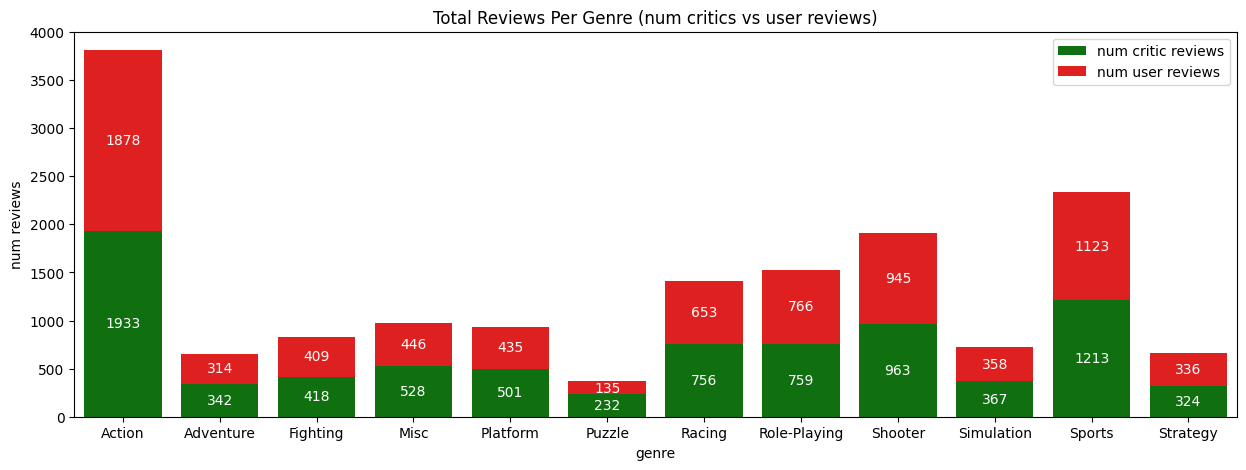

In [46]:
#ploting the num reviews per genre
plt.figure(figsize = (15, 5))
ax1 = sns.barplot(reviews_per_genre, x = 'genre', y = 'num_critic_reviews',
                 color = 'green',
                 label = 'num critic reviews')
ax2 = sns.barplot(reviews_per_genre, x = 'genre', y = 'num_user_reviews',
            color = 'red',
            label = 'num user reviews',
            bottom = reviews_per_genre['num_critic_reviews'])
ax1.bar_label(ax1.containers[0],label_type='center', color = 'white') #shows the value of the bar in the chart
ax2.bar_label(ax2.containers[1],label_type='center', color = 'white')
plt.legend()

plt.title('Total Reviews Per Genre (num critics vs user reviews)')
plt.ylabel('num reviews')

This graphical representation underscores the dominance of the action genre, exhibiting the highest aggregate of reviews. Notably, a near-equitable distribution is evident in the ratio of critic to user reviews, with an approximate 50/50 split. Across other genres, there is a subtle inclination towards a higher count of critic reviews compared to user reviews. This observation is noteworthy, particularly in light of the preceding visualization wherein critics exhibited lower overall scores. This discrepancy may be attributed to various factors, including the possibility that critic scores demonstrate a narrower range of variation. Further analysis is warranted to elucidate these nuances and offer a comprehensive understanding of the underlying dynamics.

Having this in mind, we move to the next set of visualizations. Now we would be looking at different variables and how they relate to critic and user scores.

#### 3.5: Exploring different variables to determine which factors lead to higher critic scores, user scores.

First we are going to take a look at the genre variable. We want to see which platforms are rated higher by critcs and which platforms are rated higher by users.

##### 3.5.2: Which console gets a higher average rating among critics, users?

Text(0, 0.5, 'score')

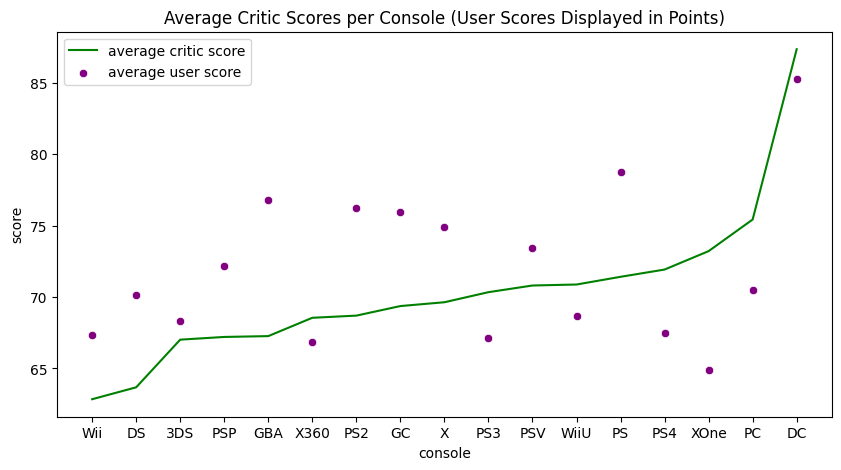

In [47]:
#creating a dataframe that have the average scores (critic and user) per console
console_scores = video_games[['console', 'critic_score', 'user_score']].groupby('console').mean().dropna().sort_values(by='critic_score').reset_index()
console_scores;

#plotting the new dataframe
plt.figure(figsize = (10,5))
sns.lineplot(console_scores, x = 'console', y = 'critic_score', color = 'green', label = ('average critic score'))
sns.scatterplot(console_scores, x = 'console', y = 'user_score', color = 'purple', label = ('average user score'))

plt.legend()
plt.title("Average Critic Scores per Console (User Scores Displayed in Points)")
plt.ylabel('score')

This visualization predominantly highlights the top-rated scores assigned by critics and their respective console affiliations. Notably, the top five consoles featuring in this analysis comprise contemporary platforms, including the Xbox One, PC games, and PlayStation (1 and 4). Interestingly, the Dreamcast, an older platform, emerges as the highest-rated, surpassing even the newer alternatives.

Moreover, contrasting the user scores against this alignment reveals a departure from the established trend. The user scores do not exhibit a parallel pattern, indicating a divergence in preferences. To further explore this disparity, a subsequent chart will be generated, this time sorting user scores to identify their top five consoles.

Text(0, 0.5, 'score')

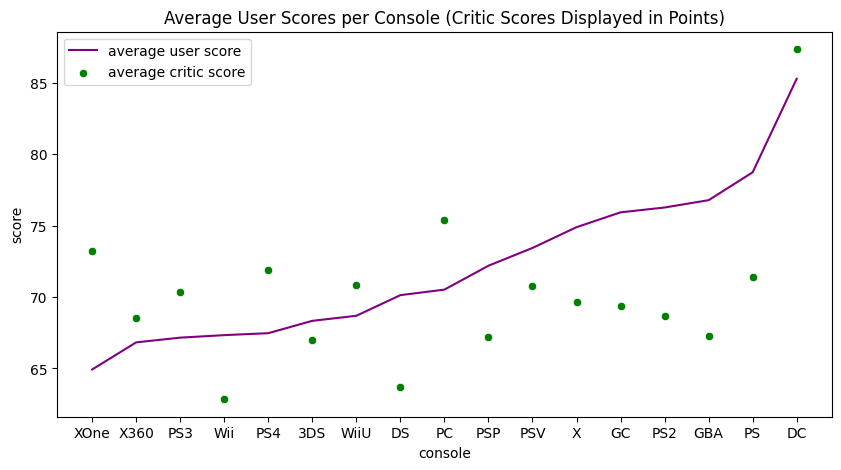

In [48]:
#plotting the user scores as the main (lineplot)
plt.figure(figsize = (10,5))
console_scores = console_scores.sort_values(by='user_score') #sorts the data by user scores
sns.lineplot(console_scores, x = 'console', y = 'user_score', color = 'purple', label = ('average user score'))
sns.scatterplot(console_scores, x = 'console', y = 'critic_score', color = 'green', label = ('average critic score'))

plt.legend()
plt.title("Average User Scores per Console (Critic Scores Displayed in Points)")
plt.ylabel('score')

In this analysis, a distinct pattern emerges as the top-rated consoles by users feature the likes of Playstation 1 and 2, GameCube, GameBoy Advanced, and the perennially acclaimed Dreamcast. An intriguing observation is that users consistently assign higher ratings to games on older platforms, presenting a noteworthy departure from the preferences observed among critics. Strikingly, the latest gaming consoles, Xbox One and PS4, find themselves at the lower end of the spectrum in user evaluations, indicating a nuanced perspective in which users may perceive value and quality in the experiences offered by these older gaming systems. This trend underscores the diverse and evolving landscape of user preferences across different console generations.

Diving further into this, we wanted to explore if we could find patterns in between genres and scores.

##### 3.5.1: Which genre gets a higher average rating among critics, users?

In [49]:
#creating a data frame that holds the average scores per genre
genre_scores = video_games[['genre', 'critic_score', 'user_score']].groupby('genre').mean().dropna().sort_values(by='critic_score').reset_index()
genre_scores

,genre,critic_score,user_score
0,Adventure,65.263158,71.213376
1,Misc,66.607955,68.239910
2,Action,66.652871,70.498935
3,Puzzle,67.487069,71.800000
4,Racing,67.808201,70.032159
5,Platform,68.091816,72.763218
6,Simulation,68.564033,71.282123
7,Fighting,69.308612,73.026895
8,Shooter,70.118380,70.230688
9,Strategy,71.731481,72.875000


Text(0, 0.5, 'score')

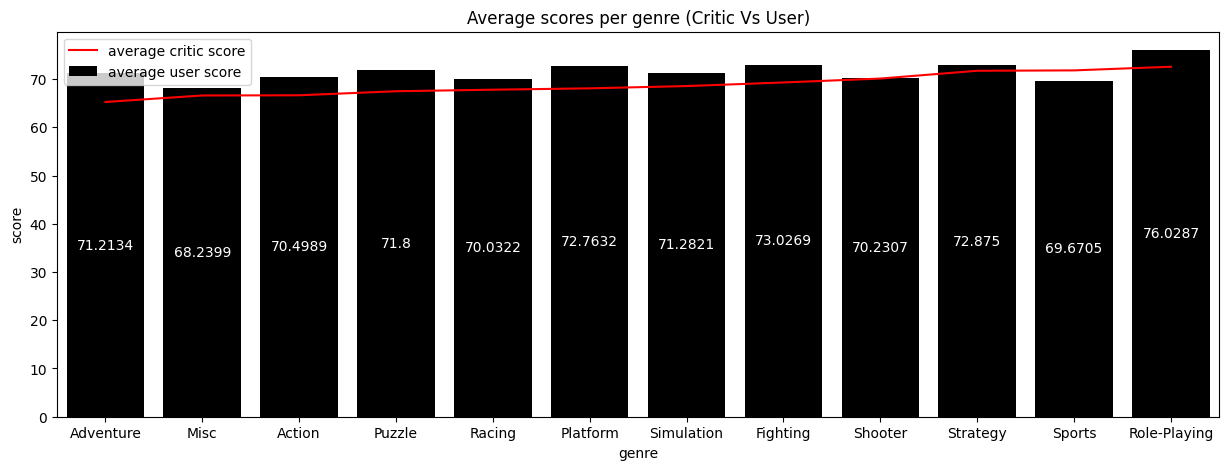

In [50]:
#graphing both critic scores and user score per genre
plt.figure(figsize = (15, 5))
sns.lineplot(genre_scores, x = 'genre', y = 'critic_score', color = 'red', label = 'average critic score') #sorted
#not sorted but showed the values for better visualization
ax = sns.barplot(genre_scores, x = 'genre', y = 'user_score', color = 'black', label = 'average user score')
ax.bar_label(ax.containers[0],label_type='center', color = 'white')

plt.legend()
plt.title("Average scores per genre (Critic Vs User)")
plt.ylabel('score')

This visualization serves a dual purpose by presenting (1) the sorted average scores per genre for critics and (2) the unsorted average scores per genre for users. Noteworthy trends emerge, indicating that users consistently assign high ratings to the shooter, strategy, and sports genres, whereas critics favor fighting, strategy, and platform genres. An intriguing convergence is observed in the role-playing genre, which attains the highest scores across both user and critic evaluations, as well as strategy. Beyond this alignment, distinct patterns emerge, revealing disparate preferences in the genres that receive high scores from each group.

To delve deeper into this, we wanted to look at just the Action and Sports games (since these had the highest sales) and see if there is any statistically significant association between the genre and scores.

#### 3.6: Do action games sell more than sports games just based off of their genre?

Part of determining what makes a game successful with critics and/or users could be the genre. We wanted to run permutation test that compared the scores between both groups for the 2 genres with the greatest sales. The goal being to determine if genre has an effect on the average score for both critics and users. For the sake of avoiding repetition, the hypothesis applies to both critic and user scores as noted below. The tests we are conducting shuffles both scores under the same 2 genres (action and sports).

Null hypothesis: There is no association between genre (action or sports) and average score. (Action games are not scored higher than sports games based on genre)

$$ \mu_S = \mu_A$$

Alternative hypothesis : There is an association between genre (action or sports) and average score. (Action games are scored higher than sports games based on genre)

$$ \mu_S < \mu_A $$

Note: $$\mu_A \text{ represents the true mean score (user or critic) for all action games}$$

$$\mu_S \text{ represents the true mean score (user or critic) for all sports games}$$

Testing with an alpha value = 0.05

##### First we ran the test with just the user scores: #####

In [51]:
#Simulating a permutation test for average user score
num_iterations = 10000
results_many_genre_shuffles = np.array([])
video_games_action_sports = video_games[(video_games['genre'] == 'Action') | (video_games['genre'] == 'Sports')].reset_index()

for i in range(num_iterations):

    #permuting the score data
    video_games_action_sports['shuffled_scores'] = np.random.permutation(video_games_action_sports['user_score'])

    #shuffling the user scores
    action_scores_after_shuffling = video_games_action_sports[video_games_action_sports['genre'] == 'Action']
    sports_scores_after_shuffling = video_games_action_sports[video_games_action_sports['genre'] == 'Sports']

    #taking the difference between means and recording it
    diff_in_means_scores = sports_scores_after_shuffling['shuffled_scores'].mean() - action_scores_after_shuffling['shuffled_scores'].mean()
    results_many_genre_shuffles = np.append(results_many_genre_shuffles, diff_in_means_scores)

results_many_genre_shuffles

array([-0.29792755, -0.64538637,  0.91653478, ...,  0.29343098,
        0.231339  , -0.64631349])

In [52]:
#calculating the test statistic
action_mean_score = video_games_action_sports[(video_games_action_sports['genre'] == 'Action')]
sports_mean_score = video_games_action_sports[(video_games_action_sports['genre'] == 'Sports')]
test_stat_action_sports_user = sports_mean_score['user_score'].mean() - action_mean_score['user_score'].mean()
test_stat_action_sports_user

-0.8284096588231193

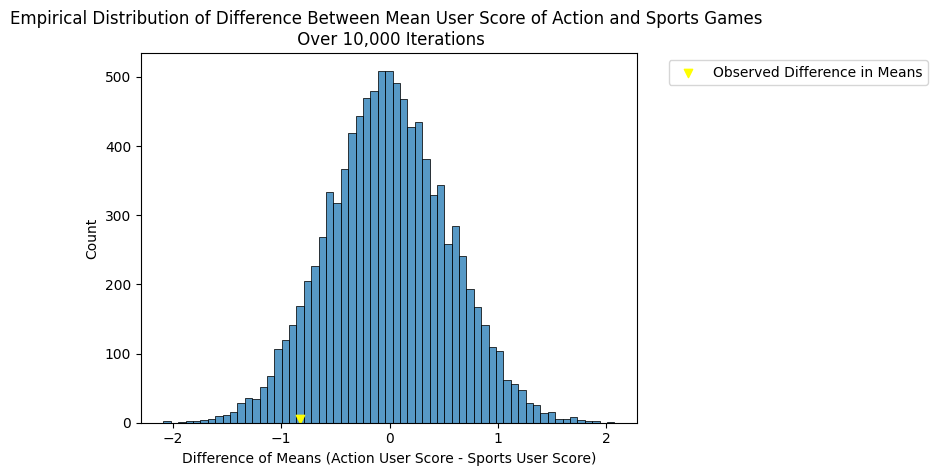

In [53]:
#building histogram/empirical distribution
sns.histplot(results_many_genre_shuffles)
plt.scatter(test_stat_action_sports_user, y = 5, marker ='v', color = 'yellow', label='Observed Difference in Means')
plt.title(f'Empirical Distribution of Difference Between Mean User Score of Action and Sports Games \n Over {num_iterations:,} Iterations')
plt.xlabel('Difference of Means (Action User Score - Sports User Score)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left');

In [54]:
#calculating the p-value
p_value = np.count_nonzero(results_many_genre_shuffles >= test_stat_action_sports_user)/num_iterations
p_value

0.9289

Under the assumption that the null hypothesis is true (there is no association between genre (action or sports) and user score), there is approximately a 94.34% chance that we would observe a test statistic as extreme or moreso than -0.8284. Given that 0.9434 is greater than our alpha value of 0.05, we fail to reject the notion that there is no association between genre and user score. Any relationship witnessed between the two could be due to natural variability or confounding variables.

##### Now, we look at the difference for critic scores: #####

In [55]:
#Simulating a permutation test for average critic score
num_iterations = 10000
results_many_genre_shuffles = np.array([])
video_games_action_sports = video_games[(video_games['genre'] == 'Action') | (video_games['genre'] == 'Sports')].reset_index()

for i in range(num_iterations):

    #permuting the score data
    video_games_action_sports['shuffled_scores'] = np.random.permutation(video_games_action_sports['critic_score'])

    #shuffling the critic scores
    action_scores_after_shuffling = video_games_action_sports[video_games_action_sports['genre'] == 'Action']
    sports_scores_after_shuffling = video_games_action_sports[video_games_action_sports['genre'] == 'Sports']

    #taking the difference between means and recording it
    diff_in_means_scores = sports_scores_after_shuffling['shuffled_scores'].mean() - action_scores_after_shuffling['shuffled_scores'].mean()
    results_many_genre_shuffles = np.append(results_many_genre_shuffles, diff_in_means_scores)

results_many_genre_shuffles

array([-0.38058664,  0.14556264, -0.45705576, ...,  0.6918071 ,
        0.2941173 , -0.04409013])

In [56]:
#calculating test statistic
action_mean_sales = video_games_action_sports[(video_games_action_sports['genre'] == 'Action')]
sports_mean_sales = video_games_action_sports[(video_games_action_sports['genre'] == 'Sports')]
test_stat_action_sports_critics = sports_mean_sales['critic_score'].mean() - action_mean_sales['critic_score'].mean()
test_stat_action_sports_critics

5.161638295939525

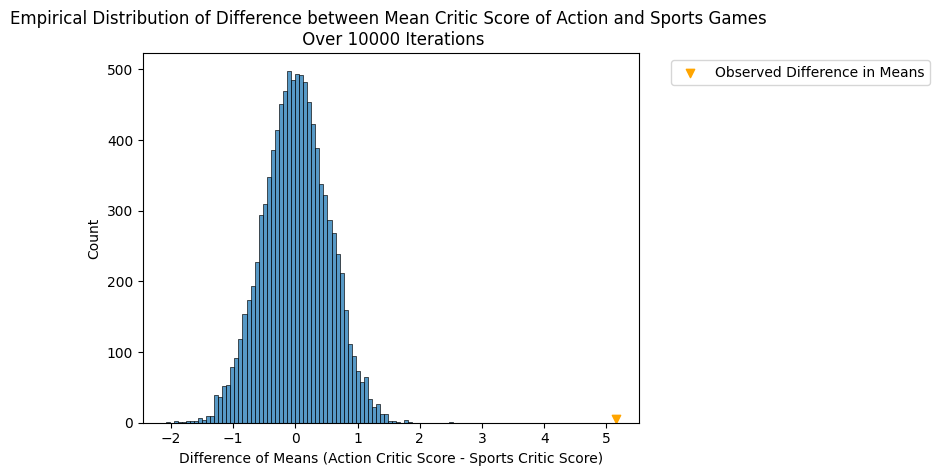

In [57]:
#building histogram/empirical distribution
sns.histplot(results_many_genre_shuffles)
plt.scatter(test_stat_action_sports_critics, y = 5, marker ='v', color = 'orange', label='Observed Difference in Means')
plt.title(f'Empirical Distribution of Difference between Mean Critic Score of Action and Sports Games \n Over {num_iterations} Iterations')
plt.xlabel('Difference of Means (Action Critic Score - Sports Critic Score)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left');

In [58]:
p_value = np.count_nonzero(results_many_genre_shuffles >= test_stat_action_sports_critics)/num_iterations
p_value

0.0

Under the assumption that the null hypothesis is true (there is no association between genre (either action or sports) and critic score), there is essentially a 0.0% chance that we would observe a test statistic as extreme or moreso than 5.1616. Given that 0.0 is less than our alpha value of 0.05, we reject the notion that there is no association between genre and critic score. There is evidence to support that there is an association between genre (action or sports) and critic score.

Even with using the same 2 genres, these graphs show that there is a difference between critic ratings and user ratings. As seen in our earlier findings, the factors that make a game successful for both types of reviewers are different. It appears that genre is associated with higher critic ratings whereas genre appears to not be associated with higher user ratings. A further investigation could be to go into more detail and including more genres in the simulation.

---

## 4. Conclusion

Given that our data is from an observational study, we are unable to conclude any cause and effect relationships between variables. Overall users rated games higher than critics, and more scores in total were given by critics. What we can conclude is that there appears to be an association with genre and higher critic scores whereas high user scores do not appear to be associated with a specific genre. In addition, critics appear to prefer more modern games and users rated older games higher.

If we were to continue our exploration of this data some avenues to explore would be to include more genres for testing​ (rather than using the 2 most popular), consider if publisher/developer is associated with higher scores​, and possibly collecting more information for more recent games. Conducting an experiment would be more beneficial so as to be able to draw a cause and effect relationship as well.

In summary, our current findings contribute to a nuanced understanding of the dynamics between user and critic ratings, genre preferences, and the temporal aspects of game ratings. Future research, incorporating additional variables and experimental designs, holds the potential to further enrich our understanding of the complex factors influencing game evaluations.